# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | BA overbook every flight to ...
1,✅ Trip Verified | \r\nThe flights were all on...
2,Not Verified | Only the second time flying BA ...
3,✅ Trip Verified | I wasn't going to bother rev...
4,✅ Trip Verified | I booked business class tic...


In [4]:
df.to_csv(r"C:\Users\disha\OneDrive\Documents\data\BA_Reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,✅ Trip Verified | BA overbook every flight to ...
1,✅ Trip Verified | \r\nThe flights were all on...
2,Not Verified | Only the second time flying BA ...
3,✅ Trip Verified | I wasn't going to bother rev...
4,✅ Trip Verified | I booked business class tic...
...,...
995,✅ Trip Verified | London to Madrid. Lazy seat...
996,✅ Trip Verified | Luggage broken into – no ex...
997,✅ Trip Verified | London to Tehran back in Au...
998,✅ Trip Verified | Pisa to London Heathrow. Ha...


#### Removing the parts before | in the reviews column

In [6]:
df.reviews = df.reviews.str.split('|',expand=True)[1]

In [7]:
df

,reviews
0,BA overbook every flight to maximise their in...
1,"\r\nThe flights were all on time, except Bel..."
2,Only the second time flying BA as first time ...
3,I wasn't going to bother reviewing this fligh...
4,I booked business class tickets for my fianc...
...,...
995,London to Madrid. Lazy seat allocation has l...
996,Luggage broken into – no explanation. First ...
997,London to Tehran back in August 2017. The ca...
998,Pisa to London Heathrow. Having booked and p...


#### Rule-based approach

Classifying data based on a set of rules.

#### Data preprocessing steps

1. Cleaning the text
2. Tokenization
3. Enrichment - POS tagging
4. Stopwords removal
5. Obtaining the stem words

### Step 1: Cleaning the text

In [8]:
import re

#Define a function to clean the text
def clean(text):
    #Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+',' ',str(text))
    return text

#Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,BA overbook every flight to maximise their in...,BA overbook every flight to maximise their in...
1,"\r\nThe flights were all on time, except Bel...",The flights were all on time except Belfast f...
2,Only the second time flying BA as first time ...,Only the second time flying BA as first time ...
3,I wasn't going to bother reviewing this fligh...,I wasn t going to bother reviewing this fligh...
4,I booked business class tickets for my fianc...,I booked business class tickets for my fianc ...


### Step 5: Obtaining the stem words

In [18]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...


In [20]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word,pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,BA overbook every flight to maximise their in...,BA overbook every flight to maximise their in...,"[(BA, n), (overbook, None), (every, None), (fl..."
1,"\r\nThe flights were all on time, except Bel...",The flights were all on time except Belfast f...,"[(flights, n), (time, n), (except, None), (Bel..."
2,Only the second time flying BA as first time ...,Only the second time flying BA as first time ...,"[(second, a), (time, n), (flying, v), (BA, n),..."
3,I wasn't going to bother reviewing this fligh...,I wasn t going to bother reviewing this fligh...,"[(going, v), (bother, v), (reviewing, v), (fli..."
4,I booked business class tickets for my fianc...,I booked business class tickets for my fianc ...,"[(booked, v), (business, n), (class, n), (tick..."


In [24]:
# Obtaining the stem words - Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,BA overbook every flight to maximise their in...,BA overbook every flight to maximise their in...,"[(BA, n), (overbook, None), (every, None), (fl...",BA overbook every flight maximise income reg...
1,"\r\nThe flights were all on time, except Bel...",The flights were all on time except Belfast f...,"[(flights, n), (time, n), (except, None), (Bel...",flight time except Belfast London never Staf...
2,Only the second time flying BA as first time ...,Only the second time flying BA as first time ...,"[(second, a), (time, n), (flying, v), (BA, n),...",second time fly BA first time positive Could...
3,I wasn't going to bother reviewing this fligh...,I wasn t going to bother reviewing this fligh...,"[(going, v), (bother, v), (reviewing, v), (fli...",go bother review flight seem perpetual downe...
4,I booked business class tickets for my fianc...,I booked business class tickets for my fianc ...,"[(booked, v), (business, n), (class, n), (tick...",book business class ticket fianc reschedule ...


In [25]:
df[['reviews','Lemma']]

,reviews,Lemma
0,BA overbook every flight to maximise their in...,BA overbook every flight maximise income reg...
1,"\r\nThe flights were all on time, except Bel...",flight time except Belfast London never Staf...
2,Only the second time flying BA as first time ...,second time fly BA first time positive Could...
3,I wasn't going to bother reviewing this fligh...,go bother review flight seem perpetual downe...
4,I booked business class tickets for my fianc...,book business class ticket fianc reschedule ...
...,...,...
995,London to Madrid. Lazy seat allocation has l...,London Madrid Lazy seat allocation lead husb...
996,Luggage broken into – no explanation. First ...,Luggage break explanation First good point C...
997,London to Tehran back in August 2017. The ca...,London Tehran back August cabin look old tir...
998,Pisa to London Heathrow. Having booked and p...,Pisa London Heathrow book pay extra leg room...


## Sentiment Analysis using VADER

vader sentiment not only tells if the statement is +ve or -ve but along with the intensity of emotion

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,BA overbook every flight to maximise their in...,BA overbook every flight to maximise their in...,"[(BA, n), (overbook, None), (every, None), (fl...",BA overbook every flight maximise income reg...,-0.4939,Negative
1,"\r\nThe flights were all on time, except Bel...",The flights were all on time except Belfast f...,"[(flights, n), (time, n), (except, None), (Bel...",flight time except Belfast London never Staf...,-0.8192,Negative
2,Only the second time flying BA as first time ...,Only the second time flying BA as first time ...,"[(second, a), (time, n), (flying, v), (BA, n),...",second time fly BA first time positive Could...,0.9349,Positive
3,I wasn't going to bother reviewing this fligh...,I wasn t going to bother reviewing this fligh...,"[(going, v), (bother, v), (reviewing, v), (fli...",go bother review flight seem perpetual downe...,0.6597,Positive
4,I booked business class tickets for my fianc...,I booked business class tickets for my fianc ...,"[(booked, v), (business, n), (class, n), (tick...",book business class ticket fianc reschedule ...,-0.5267,Negative


In [27]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    522
Negative    373
Neutral     105
Name: Analysis, dtype: int64

## Visual Representation

([<matplotlib.patches.Wedge at 0x2ca7886a520>,
 [Text(-0.07596607924664518, 1.09737375346957, 'Positive'),
  Text(-0.28358804185660713, -1.0628159871379126, 'Negative'),
  Text(1.2772152593917465, -0.43728844162277347, 'Neutral')],
 [Text(-0.04143604322544282, 0.5985675018924926, '52.2%'),
  Text(-0.15468438646724025, -0.5797178111661341, '37.3%'),
  Text(0.8041725707281367, -0.27532975954026473, '10.5%')])

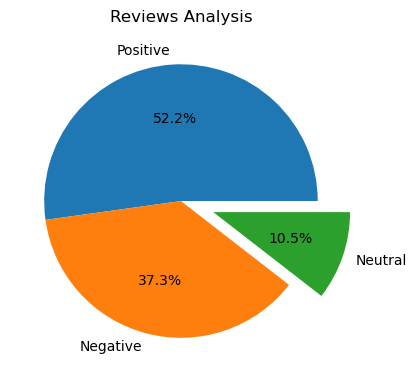

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [30]:
df.to_csv("BA_reviews.csv")

### Wordcloud

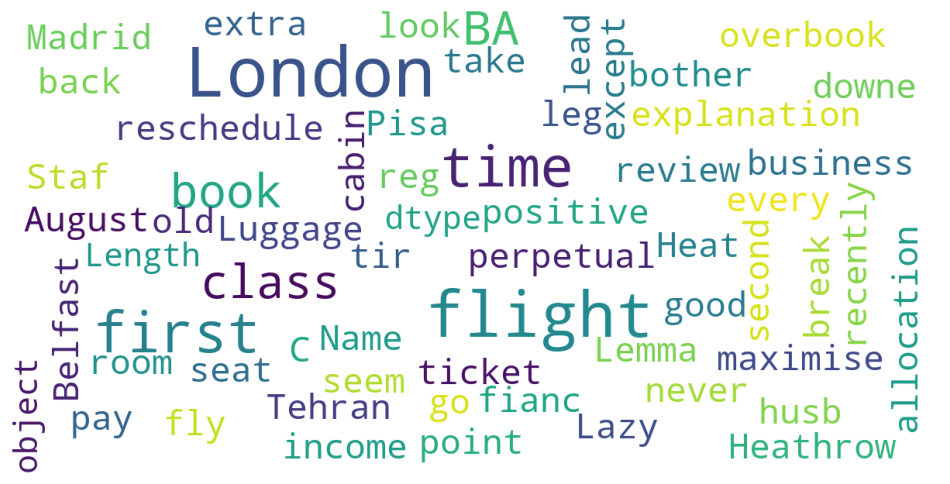

In [33]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        random_state = 1)
    
    wordcloud = wordcloud.generate(str(data))
    
    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df.Lemma)